In [1]:
import pandas as pd, numpy as np
from pathlib import Path
from clima_eda.csv_loader import CSVLoader
from clima_eda.transforms import clean_columns, ensure_year_month, standardize_city_country
from clima_eda.analysis import climatology, add_anomaly, rolling_features
from clima_eda.trends import annual_agg, trend_slope, correlation_temp_precip, rank_cities_by_warming
from clima_eda.viz import plot_city_timeseries, plot_rankings_bar, plot_distribution, plot_scatter

pd.set_option("display.max_columns", None)
p = Path("..").resolve()

In [2]:
temp = CSVLoader(p/"data/temperaturas.csv", parse_dates=["date"], required_cols=["city","date","t_mean"]).load()
prec = CSVLoader(p/"data/precipitaciones.csv", parse_dates=["date"], required_cols=["city","date","precip_mm"]).load()

In [3]:
temp = ensure_year_month(clean_columns(temp))
prec = ensure_year_month(clean_columns(prec))

temp = standardize_city_country(temp)
prec = standardize_city_country(prec)

In [4]:
cols_t = ["city","year","month","t_mean"]
cols_p = ["city","year","month","precip_mm"]
df = temp[cols_t].merge(prec[cols_p], on=["city","year","month"], how="inner")
df.head()

,city,year,month,t_mean,precip_mm
0,Madrid,2010,1,15.172519,35.280554
1,Madrid,2010,2,21.635483,31.685048
2,Madrid,2010,3,23.697590,27.799318
3,Madrid,2010,4,24.115850,51.111555
4,Madrid,2010,5,22.517062,51.656403


In [5]:
clim = climatology(df, value="t_mean")
df = add_anomaly(df, clim, value="t_mean")
df = rolling_features(df)
df.head()

,city,year,month,t_mean,precip_mm,t_mean_clim,t_mean_anomaly,t_mean_roll12,precip_roll12
1080,Berlin,2010,1,12.354754,41.583220,10.624168,1.730586,NaN,NaN
1081,Berlin,2010,2,15.475776,54.587301,15.125683,0.350092,NaN,NaN
1082,Berlin,2010,3,17.537871,57.696169,18.408640,-0.870768,NaN,NaN
1083,Berlin,2010,4,18.515402,40.603034,20.313715,-1.798314,NaN,NaN
1084,Berlin,2010,5,18.054548,73.231925,19.081137,-1.026588,NaN,NaN


In [6]:
trends = trend_slope(df, value="t_mean")
trends.sort_values("trend_per_decade", ascending=False).head()

corr = correlation_temp_precip(df)
corr.sort_values("corr_t_precip", ascending=False).head()

,city,corr_t_precip
3,London,0.548972
5,Mexico City,0.505949
7,Paris,0.445337
0,Berlin,0.416394
6,New York,0.401059


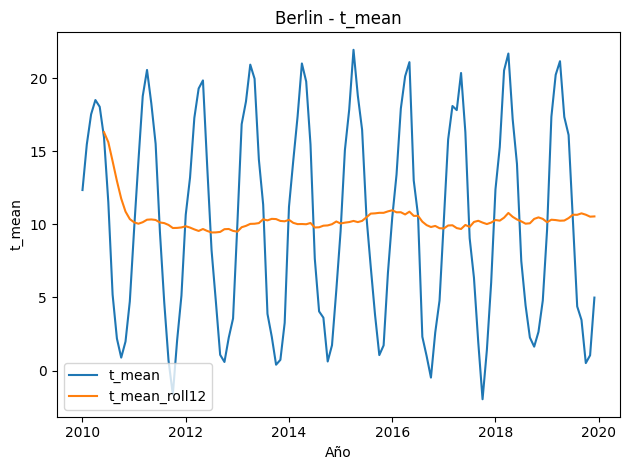

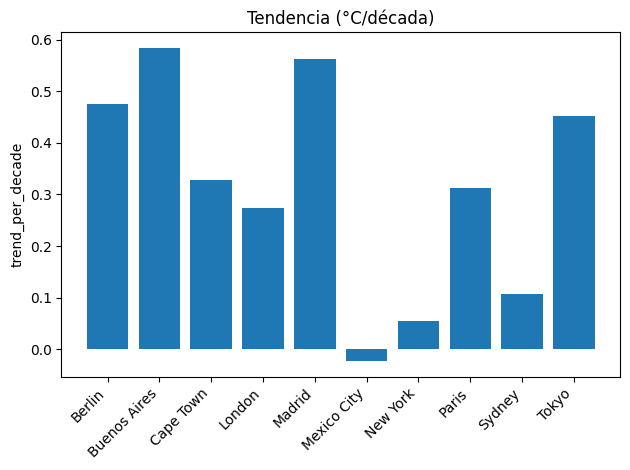

KeyError: 't_anomaly'

In [7]:
city0 = df["city"].iloc[0]
plot_city_timeseries(df, city0, value="t_mean", rolling=True)

plot_rankings_bar(trends, value="trend_per_decade")

plot_distribution(df, value="t_anomaly")

plot_scatter(df, x="t_anomaly", y="precip_mm")

In [8]:
out = Path("../output"); out.mkdir(exist_ok=True)
trends.to_csv(out/"trends_by_city.csv", index=False)
df.to_csv(out/"dataset_features.csv", index=False)
print("Exportado en output/.")

Exportado en output/.
